<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Machine-Learning-Modeling-Summary-For-Deployment" data-toc-modified-id="Machine-Learning-Modeling-Summary-For-Deployment-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Machine Learning Modeling Summary For Deployment<a id="6_Machine_Learning_Modeling_Summary"></a></a></span><ul class="toc-item"><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Executive Summary<a id="6.1_Executive_Summary"></a></a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Imports<a id="6.2_Imports"></a></a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Loading the Data<a id="6.3_Loading_Data"></a></a></span></li><li><span><a href="#Separating-Dataset-into-Train-and-Test" data-toc-modified-id="Separating-Dataset-into-Train-and-Test-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Separating Dataset into Train and Test<a id="6.4_Separating_Data_Train_Test"></a></a></span></li><li><span><a href="#Loading-Selected-Features" data-toc-modified-id="Loading-Selected-Features-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Loading Selected Features<a id="6.5_Loading_Selected_Features"></a></a></span></li><li><span><a href="#Imputing-Missing-Values" data-toc-modified-id="Imputing-Missing-Values-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Imputing Missing Values<a id="6.6_Imputing_Missing_Values"></a></a></span><ul class="toc-item"><li><span><a href="#Imputing-Categorical-Variables-Missing-Values" data-toc-modified-id="Imputing-Categorical-Variables-Missing-Values-6.6.1"><span class="toc-item-num">6.6.1&nbsp;&nbsp;</span>Imputing Categorical Variables Missing Values<a id="6.6.1_Categorical_Variables_Imputation"></a></a></span></li><li><span><a href="#Imputing-Numerical-Variables-Missing-Values" data-toc-modified-id="Imputing-Numerical-Variables-Missing-Values-6.6.2"><span class="toc-item-num">6.6.2&nbsp;&nbsp;</span>Imputing Numerical Variables Missing Values<a id="6.6.2_Numerical_Variables_Imputation"></a></a></span></li></ul></li><li><span><a href="#Temporal-Variables" data-toc-modified-id="Temporal-Variables-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Temporal Variables<a id="6.7_Temporal_Variables"></a></a></span></li><li><span><a href="#Transformation-of-Numerical-Variables" data-toc-modified-id="Transformation-of-Numerical-Variables-6.8"><span class="toc-item-num">6.8&nbsp;&nbsp;</span>Transformation of Numerical Variables<a id="6.8_Transformation_Numerical_Variables"></a></a></span></li><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-6.9"><span class="toc-item-num">6.9&nbsp;&nbsp;</span>Categorical Variables<a id="6.9_Categorical_Variables"></a></a></span><ul class="toc-item"><li><span><a href="#Removing-Rare-Labels" data-toc-modified-id="Removing-Rare-Labels-6.9.1"><span class="toc-item-num">6.9.1&nbsp;&nbsp;</span>Removing Rare Labels<a id="6.9.1_Removing_Rare_Labels"></a></a></span></li><li><span><a href="#Encoding-Categorical-Variables" data-toc-modified-id="Encoding-Categorical-Variables-6.9.2"><span class="toc-item-num">6.9.2&nbsp;&nbsp;</span>Encoding Categorical Variables<a id="6.9.2_Encoding_Categorical_Variables"></a></a></span></li></ul></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-6.10"><span class="toc-item-num">6.10&nbsp;&nbsp;</span>Feature Scaling<a id="6.10_Feature_Scaling"></a></a></span></li><li><span><a href="#Train-the-Model-with-Linear-Regression-(Lasso)" data-toc-modified-id="Train-the-Model-with-Linear-Regression-(Lasso)-6.11"><span class="toc-item-num">6.11&nbsp;&nbsp;</span>Train the Model with Linear Regression (Lasso)<a id="6.11_Train_ML_Model"></a></a></span></li></ul></li></ul></div>

# Machine Learning Modeling Summary For Deployment<a id='6_Machine_Learning_Modeling_Summary'></a>

## Executive Summary<a id='6.1_Executive_Summary'></a>

I have followed the steps for the development of the machine learning models as shown below:
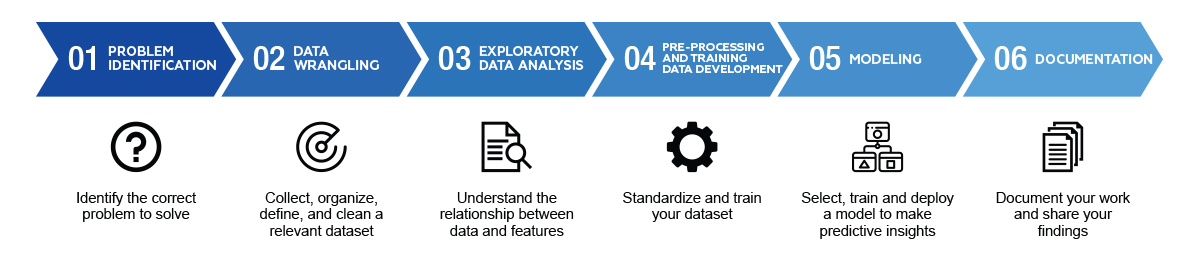

Based on the above DSM methodology, a dedicated jupyter notebook was created to focus on one aspect at a time and you can refer these notebooks from the below links:

   1. For **Problem Identification Notebook** - [click here]()
   2. For **Data Wrangling Notebook**, [click here]()
   3. For **Exploratory Data Analysis Notebook**, [click here]()
   4. For **Pre-Processing and Training Data Development Notebook**, [click here]()
   5. For **Machine Learning Notebook**, [click here]()

The purpose of this notebook is to capture all the steps at one place to facilitate the launch of the house prediction model to the next stage of script writing for the production purpose.

## Imports<a id='6.2_Imports'></a>

In [1]:
# Importing the required packages, libraries and utilities at one place to keep it clean
import pandas as pd
import numpy as np

# Required to divide train and test set
from sklearn.model_selection import train_test_split

# Required for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Required to build the models
from sklearn.linear_model import Lasso

# Required to evaluate the models
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Required to persist the model and the scaler
import joblib

# Required to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

## Loading the Data<a id='6.3_Loading_Data'></a>

In [2]:
# Loading the csv data file here from the data folder
data = pd.read_csv('../HousePricesPrediction/data/houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Separating Dataset into Train and Test<a id='6.4_Separating_Data_Train_Test'></a>

In [3]:
# Splitting the dataset and setting the seed
X_train, X_test, y_train, y_test = train_test_split(data, data['SalePrice'], test_size=0.1, random_state=0)

X_train.shape, X_test.shape

((1314, 81), (146, 81))

## Loading Selected Features<a id='6.5_Loading_Selected_Features'></a>

In [4]:
# Loading selected features CSV file and creating selected features
features = pd.read_csv('../HousePricesPrediction/data/selected_features.csv')

# Adding the extra feature, LotFrontage
features = features['0'].to_list() + ['LotFrontage']

print('Number of features: ', len(features))

Number of features:  23


## Imputing Missing Values<a id='6.6_Imputing_Missing_Values'></a>

### Imputing Categorical Variables Missing Values<a id='6.6.1_Categorical_Variables_Imputation'></a>

In [5]:
# Making a list of the categorical variables that contain missing values
vars_with_na = [var for var in features if X_train[var].isnull().sum() > 0 and X_train[var].dtypes == 'O']

# Imputing missing values with the 'Missing' indicator value
X_train[vars_with_na] = X_train[vars_with_na].fillna('Missing')
X_test[vars_with_na] = X_test[vars_with_na].fillna('Missing')

# Checking for the missing values for X_train
X_train[vars_with_na].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtExposure    0
FireplaceQu     0
GarageType      0
GarageFinish    0
dtype: int64

### Imputing Numerical Variables Missing Values<a id='6.6.2_Numerical_Variables_Imputation'></a>

In [6]:
# Making a list of the numerical variables that contain missing values
vars_with_na = [var for var in features if X_train[var].isnull().sum() > 0 and X_train[var].dtypes != 'O']
# Displaying vars with the missing values
vars_with_na

['LotFrontage']

In [7]:
# Calculating the mode value for the 'LotFrontage' numerical variable
mode_val = X_train['LotFrontage'].mode()[0]
print("Mode Value for the LotFrontage variable is: ", mode_val)

# Imputing missing value with the mode value in both X_train and X_test
X_train['LotFrontage'] = X_train['LotFrontage'].fillna(mode_val)
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(mode_val)

Mode Value for the LotFrontage variable is:  60.0


## Temporal Variables<a id='6.7_Temporal_Variables'></a>

In the previous notebooks, I had created and used a new variable 'YearRemodAdd' based on the elapsed years and now recreating the same here.

In [8]:
# Defining method 'elapsed_years'
def elapsed_years(df, var):
    df[var] = df['YrSold'] - df[var]
    return df

# Applying the above method on both X_train and X_test
X_train = elapsed_years(X_train, 'YearRemodAdd')
X_test = elapsed_years(X_test, 'YearRemodAdd')

## Transformation of Numerical Variables<a id='6.8_Transformation_Numerical_Variables'></a>

In [9]:
# Log transformation of the numerical variables
for var in ['LotFrontage', '1stFlrSF', 'GrLivArea', 'SalePrice']:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

## Categorical Variables<a id='6.9_Categorical_Variables'></a>

### Removing Rare Labels<a id='6.9.1_Removing_Rare_Labels'></a>

In [11]:
# Defining the categorical variables list first
cat_vars = [var for var in features if X_train[var].dtype == 'O']

# Defining the percentage of labels to isolate the rare labels
def find_frequent_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    return tmp[tmp > rare_perc].index

# Applying the above method to find out the rate categories and replace it with 'Rare' label
for var in cat_vars:
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
      
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(frequent_ls), X_train[var], 'Rare')
    X_test[var] = np.where(X_test[var].isin(frequent_ls), X_test[var], 'Rare')

### Encoding Categorical Variables<a id='6.9.2_Encoding_Categorical_Variables'></a>

In [12]:
# Assigning integers to categorical variables assigning smaller value to the category with lower mean house price
def replace_categories(train, test, var, target):

    # order the categories in a variable from that with the lowest house sale price, to that with the highest
    ordered_labels = train.groupby([var])[target].mean().sort_values().index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

    # use the dictionary to replace the categorical strings by integers
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)
    
# Replacing the variables with the encoded ones
for var in cat_vars:
    replace_categories(X_train, X_test, var, 'SalePrice')

## Feature Scaling<a id='6.10_Feature_Scaling'></a>

In [13]:
# Capturing the target variable
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

# Setting up scaler
scaler = MinMaxScaler()

# Training the scaler
scaler.fit(X_train[features])

# Explore maximum values of variables
print("Max values of scaler: \n", scaler.data_max_)

# Explore minimum values of variables
print("Min values of scaler: \n", scaler.data_min_)

Max values of scaler: 
 [190.           4.          22.          10.          60.
   2.           3.           3.           4.           4.
   4.           1.           8.45361421   8.63799389   3.
   3.           3.           5.           5.           3.
   4.           2.           5.74620319]
Min values of scaler: 
 [20.          0.          0.          1.         -1.          0.
  0.          0.          0.          0.          0.          0.
  5.81114099  5.81114099  0.          0.          0.          0.
  0.          0.          0.          0.          3.04452244]


In [14]:
# Transforming the train and test dataset
X_train = scaler.transform(X_train[features])
X_test = scaler.transform(X_test[features])

## Train the Model with Linear Regression (Lasso)<a id='6.11_Train_ML_Model'></a>

In [15]:
# Setting up the Lasso model
lasso_model = Lasso(alpha=0.005, random_state=0)
# Training the model
lasso_model.fit(X_train, y_train)
# Persist the model for future use
joblib.dump(lasso_model, '../HousePricesPrediction/data/lasso_regression.pkl')

['../HousePricesPrediction/data/lasso_regression.pkl']

In [16]:
# Evaluating the model - make predictions for training set
pred = lasso_model.predict(X_train)

# Find out the mse and rmse for the training dataset
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lasso_model.predict(X_test)

# Find out the mse and rmse for the testing dataset
print('test mse: {}'.format(int(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 1088196970
train rmse: 32987
train r2: 0.8257164844366803

test mse: 1405209371
test rmse: 37486
test r2: 0.7955201108785517

Average house price:  163000


Now I will focus on productionizing the code for the model deployment.